In [16]:
## ESSENTIAL for imports and directories --> put it in every notebook in subfolders of src
%cd ..

c:\Users\ceresini_m\github\Thesis


c:\Users\ceresini_m\github\Thesis\env_Thesis\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [17]:
import os, glob, pickle
from tqdm import tqdm
from tqdm.contrib import itertools
import numpy as np
from typing import Literal
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import random
random.seed(42)

from config_pckg.config_file import Config
import utils



In [18]:
conf = Config()
meshComplete_paths = sorted(glob.glob(os.path.join(conf.EXTERNAL_FOLDER_MESHCOMPLETE_W_LABELS, "*.pkl")))

In [19]:
meshComplete_objs = []

for path in tqdm(meshComplete_paths):
    with open(path, "rb") as f:
        meshComplete_objs.append(pickle.load(f))

100%|██████████| 146/146 [00:47<00:00,  3.10it/s]


In [5]:
obj = meshComplete_objs[0]
columns=["x-velocity", "y-velocity", "pressure"]

In [6]:
conf_dict = conf.label_normalization_mode

conf_dict1 = conf_dict.copy()
conf_dict1.update({"velocity_mode":"component_wise"})

conf_dict2 = conf_dict.copy()
conf_dict2.update({"main":"Physical"})

conf_dict3 = conf_dict.copy()
conf_dict3.update({"no_shift":False})

In [7]:
labels = utils.normalize_labels(obj.face_center_labels, conf_dict, conf)
labels1 = utils.normalize_labels(obj.face_center_labels, conf_dict1, conf)
labels2 = utils.normalize_labels(obj.face_center_labels, conf_dict2, conf)
labels3 = utils.normalize_labels(obj.face_center_labels, conf_dict3, conf)


In [8]:
conf.train_set_normalization_constants

{'vx_mean': 32.41641073191074,
 'vx_std': 26.0073457679113,
 'vy_mean': 6.744482462624798,
 'vy_std': 26.0073457679113,
 'p_mean': 47.38934264747336,
 'p_std': 1649.5444179989881,
 'v_mag_mean': 37.500903221314914,
 'v_mag_std': 25.054401968834178}

{'main': 'Physical', 'velocity_mode': 'magnitude_wise', 'graph_wise': False, 'no_shift': True}


array([[<Axes: title={'center': 'x-velocity'}>,
        <Axes: title={'center': 'y-velocity'}>,
        <Axes: title={'center': 'pressure'}>]], dtype=object)

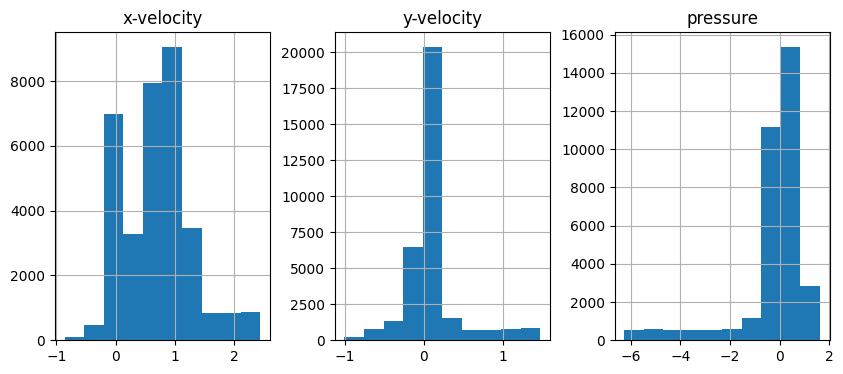

In [9]:
print(conf_dict)
labels[columns].hist(figsize=(10,4), layout=(1,3))

{'main': 'Physical', 'velocity_mode': 'component_wise', 'graph_wise': False, 'no_shift': True}


array([[<Axes: title={'center': 'x-velocity'}>,
        <Axes: title={'center': 'y-velocity'}>,
        <Axes: title={'center': 'pressure'}>]], dtype=object)

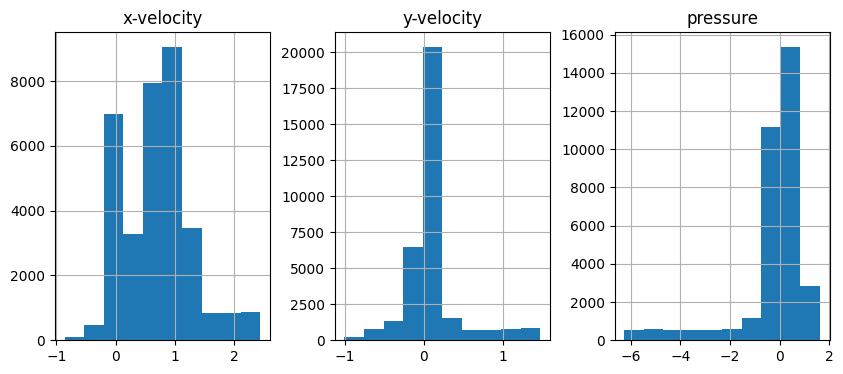

In [10]:
print(conf_dict1)
labels1[columns].hist(figsize=(10,4), layout=(1,3))

{'main': 'Physical', 'velocity_mode': 'magnitude_wise', 'graph_wise': False, 'no_shift': True}


array([[<Axes: title={'center': 'x-velocity'}>,
        <Axes: title={'center': 'y-velocity'}>,
        <Axes: title={'center': 'pressure'}>]], dtype=object)

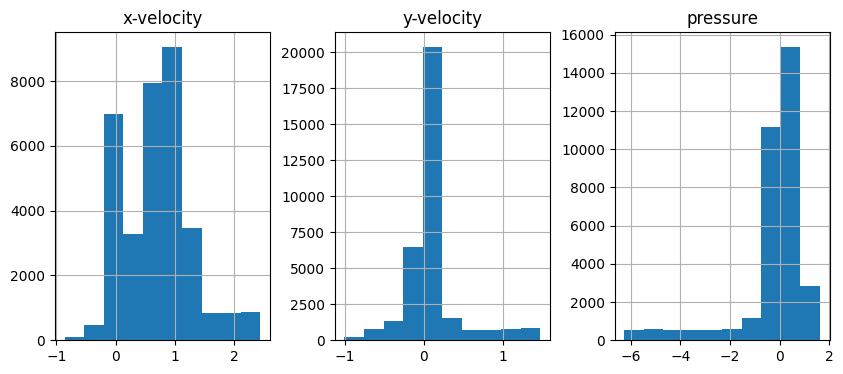

In [11]:
print(conf_dict2)
labels2[columns].hist(figsize=(10,4), layout=(1,3))

{'main': 'Physical', 'velocity_mode': 'magnitude_wise', 'graph_wise': False, 'no_shift': False}


array([[<Axes: title={'center': 'x-velocity'}>,
        <Axes: title={'center': 'y-velocity'}>,
        <Axes: title={'center': 'pressure'}>]], dtype=object)

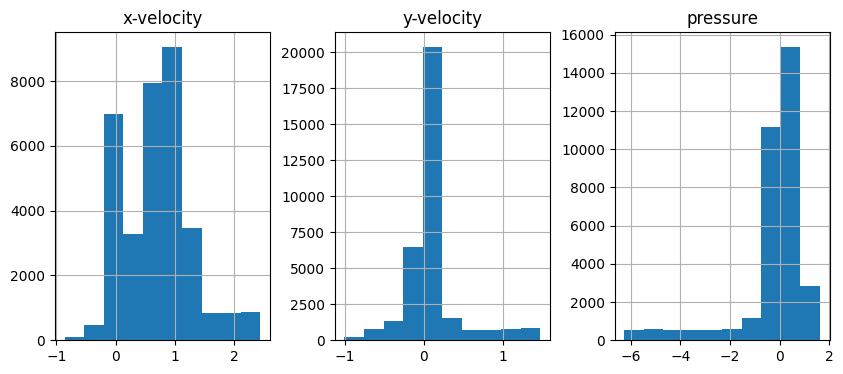

In [12]:
print(conf_dict3)
labels3[columns].hist(figsize=(10,4), layout=(1,3))

In [13]:
labels3["pressure"].mean()

-0.14926264472656423

In [20]:
for obj in tqdm(meshComplete_objs):
    
    data = utils.convert_mesh_complete_info_obj_to_graph(conf,
                                                         obj,
                                                         filename_output_graph=os.path.join(conf.EXTERNAL_FOLDER_GRAPHS, obj.name+".pt"))

100%|██████████| 146/146 [02:00<00:00,  1.21it/s]
